<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Pipeline" data-toc-modified-id="Linear-Pipeline-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Pipeline</a></span></li><li><span><a href="#Random-Forest-PIpeline" data-toc-modified-id="Random-Forest-PIpeline-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Forest PIpeline</a></span></li><li><span><a href="#XGB-pipeline" data-toc-modified-id="XGB-pipeline-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>XGB pipeline</a></span></li></ul></div>

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('rightmove_sk8_df_raw_clean_price.csv')
print(df.shape)
df.head(4)

(1004, 7)


,address,postcode,property_type,bedrooms,tenure,last_sold_date,last_sold_price
0,"19, Easton Drive, Cheadle 13 Semi-Detached 3 F...",SK8 2JD,Detached,3.0,Freehold,19 Dec 2025,384044
1,"19, Easton Drive, Cheadle 13 Semi-Detached 3 F...",SK8 2JD,Detached,3.0,Freehold,19 Dec 2025,315000
2,"105, East Avenue, Heald Green, Cheadle 10 Deta...",SK8 3BS,Detached,3.0,Leasehold,17 Dec 2025,427450
3,"3, Massie Street, Cheadle 15 Terraced 4 Freeho...",SK8 1BW,Terraced,4.0,Freehold,12 Dec 2025,287500


In [6]:
key_cols = ["address", "postcode", "last_sold_date", "last_sold_price"]
df.duplicated(subset=key_cols).sum()

np.int64(5)

In [7]:
df_raw = df.drop_duplicates(subset=key_cols, keep="first").reset_index(drop=True)
df_raw.shape

(999, 7)

In [9]:
df_raw.head(5)

,address,postcode,property_type,bedrooms,tenure,last_sold_date,last_sold_price
0,"19, Easton Drive, Cheadle 13 Semi-Detached 3 F...",SK8 2JD,Detached,3.0,Freehold,19 Dec 2025,384044
1,"19, Easton Drive, Cheadle 13 Semi-Detached 3 F...",SK8 2JD,Detached,3.0,Freehold,19 Dec 2025,315000
2,"105, East Avenue, Heald Green, Cheadle 10 Deta...",SK8 3BS,Detached,3.0,Leasehold,17 Dec 2025,427450
3,"3, Massie Street, Cheadle 15 Terraced 4 Freeho...",SK8 1BW,Terraced,4.0,Freehold,12 Dec 2025,287500
4,"12, Adshall Road, Cheadle 14 Terraced 2 Freeho...",SK8 2JN,Terraced,2.0,Freehold,12 Dec 2025,210000


In [10]:
key_cols = ["address", "postcode", "last_sold_date"]
df_raw.duplicated(subset=key_cols).sum()

np.int64(39)

In [11]:
df_wd = df_raw.drop_duplicates(subset=key_cols, keep="first").reset_index(drop=True)


In [12]:
df_wd.shape

(960, 7)

In [14]:
df_wd.head(10)

,address,postcode,property_type,bedrooms,tenure,last_sold_date,last_sold_price
0,"19, Easton Drive, Cheadle 13 Semi-Detached 3 F...",SK8 2JD,Detached,3.0,Freehold,19 Dec 2025,384044
1,"105, East Avenue, Heald Green, Cheadle 10 Deta...",SK8 3BS,Detached,3.0,Leasehold,17 Dec 2025,427450
2,"3, Massie Street, Cheadle 15 Terraced 4 Freeho...",SK8 1BW,Terraced,4.0,Freehold,12 Dec 2025,287500
3,"12, Adshall Road, Cheadle 14 Terraced 2 Freeho...",SK8 2JN,Terraced,2.0,Freehold,12 Dec 2025,210000
4,"201, Styal Road, Heald Green, Cheadle 28 Detac...",SK8 3UA,Detached,4.0,Freehold,12 Dec 2025,640000
5,"92, Ladybridge Road, Cheadle Hulme, Cheadle 16...",SK8 5PQ,Detached,2.0,Freehold,12 Dec 2025,297000
6,"34, Jackson Street, Cheadle 11 Terraced 2 Free...",SK8 2AU,Terraced,2.0,Freehold,11 Dec 2025,235000
7,"5, Farnham Close, Cheadle Hulme, Cheadle 13 Se...",SK8 6PD,Detached,3.0,Leasehold,10 Dec 2025,380000
8,"12, Brooklyn Place, Ashfield Road, Cheadle 13 ...",SK8 1BG,Flat,2.0,Leasehold,8 Dec 2025,175000
9,"114, Oakdale Drive, Heald Green, Cheadle 16 De...",SK8 3SW,Detached,4.0,Freehold,8 Dec 2025,485000


In [15]:
df_wd.to_csv("rightmove_sk8_dedup.csv", index=False, encoding="utf-8")
print("Saved: rightmove_sk8_dedup.csv")

Saved: rightmove_sk8_dedup.csv


In [16]:
df_wd["postcode_sector"] = df_wd["postcode"].str.extract(r"^([A-Z0-9]+\s*\d)")
df_wd["postcode_sector"].head()


0    SK8 2
1    SK8 3
2    SK8 1
3    SK8 2
4    SK8 3
Name: postcode_sector, dtype: object

In [17]:
df_wd["postcode_sector"].head(30)

0     SK8 2
1     SK8 3
2     SK8 1
3     SK8 2
4     SK8 3
5     SK8 5
6     SK8 2
7     SK8 6
8     SK8 1
9     SK8 3
10    SK8 5
11    SK8 3
12    SK8 2
13    SK8 3
14    SK8 2
15    SK8 3
16    SK8 5
17    SK8 3
18    SK8 7
19    SK8 2
20    SK8 6
21    SK8 5
22    SK8 2
23    SK8 7
24    SK8 6
25    SK8 1
26    SK8 5
27    SK8 3
28    SK8 4
29    SK8 2
Name: postcode_sector, dtype: object

In [18]:
df_wd["postcode_sector"].unique()


array(['SK8 2', 'SK8 3', 'SK8 1', 'SK8 5', 'SK8 6', 'SK8 7', 'SK8 4'],
      dtype=object)

In [19]:
df_wd.head()

,address,postcode,property_type,bedrooms,tenure,last_sold_date,last_sold_price,postcode_sector
0,"19, Easton Drive, Cheadle 13 Semi-Detached 3 F...",SK8 2JD,Detached,3.0,Freehold,19 Dec 2025,384044,SK8 2
1,"105, East Avenue, Heald Green, Cheadle 10 Deta...",SK8 3BS,Detached,3.0,Leasehold,17 Dec 2025,427450,SK8 3
2,"3, Massie Street, Cheadle 15 Terraced 4 Freeho...",SK8 1BW,Terraced,4.0,Freehold,12 Dec 2025,287500,SK8 1
3,"12, Adshall Road, Cheadle 14 Terraced 2 Freeho...",SK8 2JN,Terraced,2.0,Freehold,12 Dec 2025,210000,SK8 2
4,"201, Styal Road, Heald Green, Cheadle 28 Detac...",SK8 3UA,Detached,4.0,Freehold,12 Dec 2025,640000,SK8 3


<Axes: >

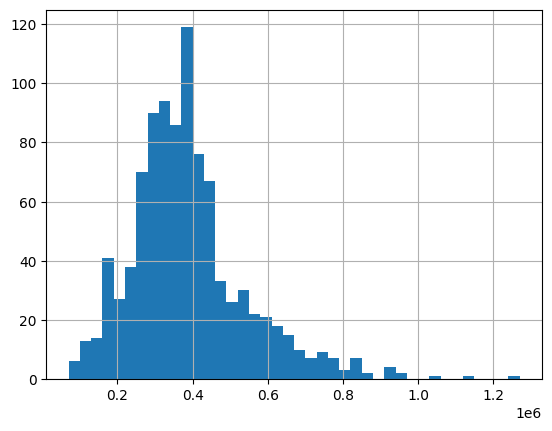

In [20]:
df_wd["last_sold_price"].hist(bins=40)

<Axes: xlabel='last_sold_price', ylabel='Count'>

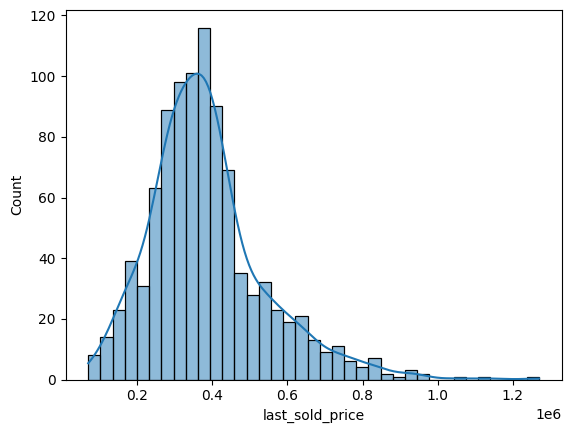

In [21]:
sns.histplot(df_wd["last_sold_price"], kde=True)

<Axes: xlabel='last_sold_price', ylabel='Count'>

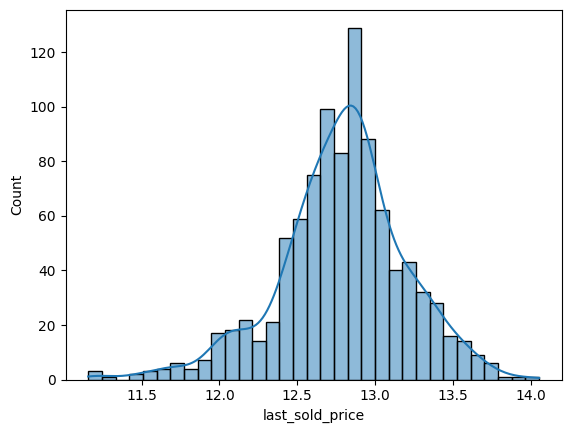

In [22]:
sns.histplot(np.log1p(df_wd["last_sold_price"]), kde=True)


<Axes: xlabel='bedrooms', ylabel='last_sold_price'>

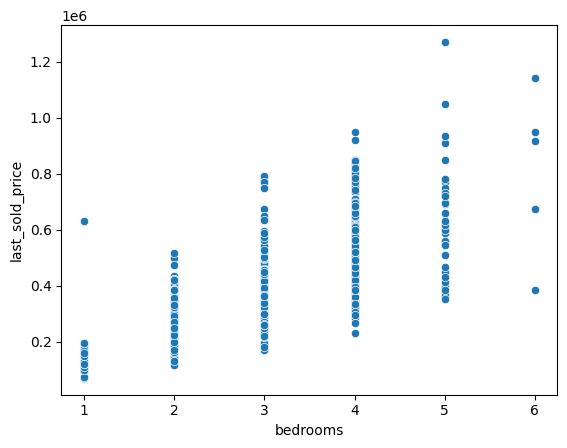

In [23]:
sns.scatterplot(x="bedrooms", y="last_sold_price", data=df_wd)

In [24]:
fc = df['bedrooms'] == 1
df[fc]

,address,postcode,property_type,bedrooms,tenure,last_sold_date,last_sold_price
42,"14, 10, Eden Place, Cheadle 14 Flat 1 Leasehol...",SK8 1DJ,Flat,1.0,Leasehold,18 Nov 2025,190000
58,"18, Dutton Court, Station Approach, Cheadle Hu...",SK8 5BF,Flat,1.0,Leasehold,11 Nov 2025,175000
86,"5, 9 The Pointe, Mellor Road, Cheadle Hulme, C...",SK8 5AT,Flat,1.0,Leasehold,24 Oct 2025,156500
120,"5, Abney Place, Cheadle 6 Flat 1 Leasehold Pre...",SK8 1GY,Flat,1.0,Leasehold,6 Oct 2025,186000
178,"34, Dutton Court, Station Approach, Cheadle Hu...",SK8 5BF,Flat,1.0,Leasehold,22 Aug 2025,150000
184,"5, Daresbury Court, Gillbent Road, Cheadle Hul...",SK8 6NJ,Flat,1.0,Leasehold,18 Aug 2025,170000
205,"6, Croft Road, Cheadle Hulme, Cheadle 10 Semi-...",SK8 5NY,Detached,1.0,Freehold,8 Aug 2025,630000
261,"38, 30 The Chimes, Lime Grove, Cheadle 11 Flat...",SK8 1DB,Flat,1.0,Leasehold,14 Jul 2025,193000
268,"2, 3, Ashfield Road, Cheadle 15 Flat 1 Leaseho...",SK8 1BB,Flat,1.0,Leasehold,10 Jul 2025,160000
272,"60, Dutton Court, Station Approach, Cheadle Hu...",SK8 5BF,Flat,1.0,Leasehold,4 Jul 2025,155000


In [26]:
df_wd[["bedrooms", "last_sold_price"]].corr()


,bedrooms,last_sold_price
bedrooms,1.000000,0.718509
last_sold_price,0.718509,1.000000


In [27]:
numeric_df = df_wd.select_dtypes(include='number')
numeric_df

,bedrooms,last_sold_price
0,3.0,384044
1,3.0,427450
2,4.0,287500
3,2.0,210000
4,4.0,640000
...,...,...
955,2.0,250000
956,3.0,298000
957,3.0,450000
958,3.0,337500


In [29]:
corr_matrix = numeric_df.corr(method='spearman')

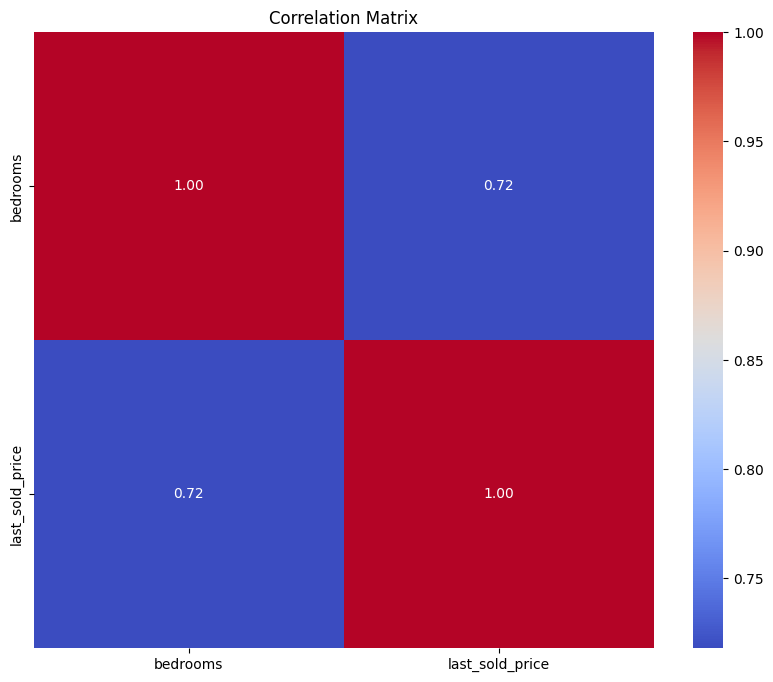

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f")

plt.title("Correlation Matrix")
plt.show()

In [33]:
df_wd.bedrooms.info()

<class 'pandas.core.series.Series'>
RangeIndex: 960 entries, 0 to 959
Series name: bedrooms
Non-Null Count  Dtype  
--------------  -----  
877 non-null    float64
dtypes: float64(1)
memory usage: 7.6 KB


In [34]:
df_wd.bedrooms.isnull().sum()

np.int64(83)

In [35]:
df_wd["last_sold_date"] = pd.to_datetime(
    df_wd["last_sold_date"],
    format="%d %b %Y",
    errors="coerce"
)

In [36]:
df_wd.head()

,address,postcode,property_type,bedrooms,tenure,last_sold_date,last_sold_price,postcode_sector
0,"19, Easton Drive, Cheadle 13 Semi-Detached 3 F...",SK8 2JD,Detached,3.0,Freehold,2025-12-19,384044,SK8 2
1,"105, East Avenue, Heald Green, Cheadle 10 Deta...",SK8 3BS,Detached,3.0,Leasehold,2025-12-17,427450,SK8 3
2,"3, Massie Street, Cheadle 15 Terraced 4 Freeho...",SK8 1BW,Terraced,4.0,Freehold,2025-12-12,287500,SK8 1
3,"12, Adshall Road, Cheadle 14 Terraced 2 Freeho...",SK8 2JN,Terraced,2.0,Freehold,2025-12-12,210000,SK8 2
4,"201, Styal Road, Heald Green, Cheadle 28 Detac...",SK8 3UA,Detached,4.0,Freehold,2025-12-12,640000,SK8 3


In [37]:
df_wd["last_sold_date"].dtype

dtype('<M8[ns]')

In [38]:
df_wd["last_sold_date"].isna().sum()


np.int64(0)

In [39]:
df_wd["sale_year"] = df_wd["last_sold_date"].dt.year


In [40]:
df_wd["sale_month"] = df_wd["last_sold_date"].dt.month


In [41]:
df_wd.head()

,address,postcode,property_type,bedrooms,tenure,last_sold_date,last_sold_price,postcode_sector,sale_year,sale_month
0,"19, Easton Drive, Cheadle 13 Semi-Detached 3 F...",SK8 2JD,Detached,3.0,Freehold,2025-12-19,384044,SK8 2,2025,12
1,"105, East Avenue, Heald Green, Cheadle 10 Deta...",SK8 3BS,Detached,3.0,Leasehold,2025-12-17,427450,SK8 3,2025,12
2,"3, Massie Street, Cheadle 15 Terraced 4 Freeho...",SK8 1BW,Terraced,4.0,Freehold,2025-12-12,287500,SK8 1,2025,12
3,"12, Adshall Road, Cheadle 14 Terraced 2 Freeho...",SK8 2JN,Terraced,2.0,Freehold,2025-12-12,210000,SK8 2,2025,12
4,"201, Styal Road, Heald Green, Cheadle 28 Detac...",SK8 3UA,Detached,4.0,Freehold,2025-12-12,640000,SK8 3,2025,12


In [42]:
df_wad = df_wd.drop('address', axis=1)
df_wad.head()

,postcode,property_type,bedrooms,tenure,last_sold_date,last_sold_price,postcode_sector,sale_year,sale_month
0,SK8 2JD,Detached,3.0,Freehold,2025-12-19,384044,SK8 2,2025,12
1,SK8 3BS,Detached,3.0,Leasehold,2025-12-17,427450,SK8 3,2025,12
2,SK8 1BW,Terraced,4.0,Freehold,2025-12-12,287500,SK8 1,2025,12
3,SK8 2JN,Terraced,2.0,Freehold,2025-12-12,210000,SK8 2,2025,12
4,SK8 3UA,Detached,4.0,Freehold,2025-12-12,640000,SK8 3,2025,12


In [43]:
df_wad.property_type.unique()

array(['Detached', 'Terraced', 'Flat'], dtype=object)

In [44]:
df["bedrooms"] = df["bedrooms"].astype("Int64")

In [45]:
df_wad.head()

,postcode,property_type,bedrooms,tenure,last_sold_date,last_sold_price,postcode_sector,sale_year,sale_month
0,SK8 2JD,Detached,3.0,Freehold,2025-12-19,384044,SK8 2,2025,12
1,SK8 3BS,Detached,3.0,Leasehold,2025-12-17,427450,SK8 3,2025,12
2,SK8 1BW,Terraced,4.0,Freehold,2025-12-12,287500,SK8 1,2025,12
3,SK8 2JN,Terraced,2.0,Freehold,2025-12-12,210000,SK8 2,2025,12
4,SK8 3UA,Detached,4.0,Freehold,2025-12-12,640000,SK8 3,2025,12


In [46]:
df_wad.bedrooms.dtype

dtype('float64')

In [47]:
df["bedrooms"] = df["bedrooms"].astype("Int64")

In [48]:
df_wad.head()

,postcode,property_type,bedrooms,tenure,last_sold_date,last_sold_price,postcode_sector,sale_year,sale_month
0,SK8 2JD,Detached,3.0,Freehold,2025-12-19,384044,SK8 2,2025,12
1,SK8 3BS,Detached,3.0,Leasehold,2025-12-17,427450,SK8 3,2025,12
2,SK8 1BW,Terraced,4.0,Freehold,2025-12-12,287500,SK8 1,2025,12
3,SK8 2JN,Terraced,2.0,Freehold,2025-12-12,210000,SK8 2,2025,12
4,SK8 3UA,Detached,4.0,Freehold,2025-12-12,640000,SK8 3,2025,12


In [49]:
df_wad.bedrooms.dtype

dtype('float64')

In [52]:
df_wad["bedrooms"] = df_wad["bedrooms"].astype("Int64")

In [53]:
df_wad.head()

,postcode,property_type,bedrooms,tenure,last_sold_date,last_sold_price,postcode_sector,sale_year,sale_month
0,SK8 2JD,Detached,3,Freehold,2025-12-19,384044,SK8 2,2025,12
1,SK8 3BS,Detached,3,Leasehold,2025-12-17,427450,SK8 3,2025,12
2,SK8 1BW,Terraced,4,Freehold,2025-12-12,287500,SK8 1,2025,12
3,SK8 2JN,Terraced,2,Freehold,2025-12-12,210000,SK8 2,2025,12
4,SK8 3UA,Detached,4,Freehold,2025-12-12,640000,SK8 3,2025,12


In [54]:
df_wad.describe()

,bedrooms,last_sold_date,last_sold_price,sale_year,sale_month
count,877.0,960,9.600000e+02,960.000000,960.000000
mean,2.969213,2025-03-31 11:27:00.000000256,3.867637e+05,2024.692708,7.100000
min,1.0,2024-09-06 00:00:00,7.000000e+04,2024.000000,1.000000
25%,2.0,2024-12-11 00:00:00,2.900000e+05,2024.000000,3.000000
50%,3.0,2025-03-14 00:00:00,3.700000e+05,2025.000000,8.000000
75%,3.0,2025-07-17 06:00:00,4.500000e+05,2025.000000,10.000000
max,6.0,2025-12-19 00:00:00,1.270000e+06,2025.000000,12.000000
std,0.897847,NaN,1.556765e+05,0.461612,3.641151


In [55]:
df_wad["last_sold_price"] = df_wad["last_sold_price"].astype("Int64")

In [56]:
df_wad.describe()

,bedrooms,last_sold_date,last_sold_price,sale_year,sale_month
count,877.0,960,960.0,960.000000,960.000000
mean,2.969213,2025-03-31 11:27:00.000000256,386763.725,2024.692708,7.100000
min,1.0,2024-09-06 00:00:00,70000.0,2024.000000,1.000000
25%,2.0,2024-12-11 00:00:00,290000.0,2024.000000,3.000000
50%,3.0,2025-03-14 00:00:00,370000.0,2025.000000,8.000000
75%,3.0,2025-07-17 06:00:00,450000.0,2025.000000,10.000000
max,6.0,2025-12-19 00:00:00,1270000.0,2025.000000,12.000000
std,0.897847,NaN,155676.463611,0.461612,3.641151


In [57]:
df_wad.tenure.unique()

array(['Freehold', 'Leasehold'], dtype=object)

In [58]:
df_wad.sale_year.dtype

dtype('int32')

In [59]:
df_wad.sale_month.dtype

dtype('int32')

## Linear Pipeline

In [60]:
df_lin = df_wad.copy()

target = "last_sold_price"

X = df_lin.drop(columns=["postcode", "last_sold_date", target])
y = df_lin[target]



In [61]:
# Train/Test split (do this early)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Separated numeric vs categorical columns
num_cols = ["bedrooms", "sale_year", "sale_month"]
cat_cols = ["postcode_sector", "property_type", "tenure"]

In [63]:
# numeric preprocessing (median impute + scale)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # fit on train only
    ("scaler", StandardScaler()),                    # fit on train only
])

In [64]:
# categorical preprocessing (most_frequent + one-hot)
from sklearn.preprocessing import OneHotEncoder

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # fit on train only
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first")),
])

In [65]:
# Combined preprocessors (ColumnTransformer)
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ],
    remainder="drop"
)

In [66]:
# Built the full Linear Regression pipeline
from sklearn.linear_model import LinearRegression

lin_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

In [67]:
# Fitted on train, predict on test, evaluate RMSE
from sklearn.metrics import mean_squared_error

lin_pipe.fit(X_train, y_train)          # everything fits on train only
y_pred = lin_pipe.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression RMSE:", rmse)

Linear Regression RMSE: 108234.98179159878


In [68]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2:", r2)


R2: 0.5751442571286425


## Random Forest PIpeline

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
num_cols = ["bedrooms", "sale_year", "sale_month"]
cat_cols = ["postcode_sector", "property_type", "tenure"]

In [71]:
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ]
)

In [72]:
rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

In [73]:
rf_pipe.fit(X_train, y_train)

y_pred_rf = rf_pipe.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("RandomForest RMSE:", rmse_rf)
print("RandomForest R2:", r2_rf)

RandomForest RMSE: 110658.86010006
RandomForest R2: 0.5559022419808831


## XGB pipeline

In [74]:
from xgboost import XGBRegressor

In [75]:
xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

In [76]:
xgb_pipe.fit(X_train, y_train)

y_pred_xgb = xgb_pipe.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost RMSE:", rmse_xgb)
print("XGBoost R2:", r2_xgb)

XGBoost RMSE: 108142.16657714974
XGBoost R2: 0.5758726000785828


In [80]:
# estimating house proce

# Create a single-row dataframe
new_house = pd.DataFrame({
    "bedrooms": [3],
    "sale_year": [2026],
    "sale_month": [2],
    "postcode_sector": ["SK8 6"],
    "property_type": ["Semi-Detached"],
    "tenure": ["Freehold"]
})

new_house

,bedrooms,sale_year,sale_month,postcode_sector,property_type,tenure
0,3,2026,2,SK8 6,Semi-Detached,Freehold


In [82]:
predicted_price = xgb_pipe.predict(new_house)

print("Estimated price:", round(predicted_price[0], 2))

Estimated price: 289856.94
